In [346]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)

%matplotlib inline

In [347]:
with open("df_pre.pkl", 'rb') as picklefile: 
    df_pre = pickle.load(picklefile)
    

In [348]:
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Mussel,Clam,Ground Lamb,Paprika,Beer,Fig,Sesame,Halibut,Chestnut,success_score
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",190,10,2,4.0,6,https://www.epicurious.com/recipes/food/views/...,6,344,2,1.00,...,0,0,0,0,0,0,0,0,0,4.000
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,2.010
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,2.905
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,4.000
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,2.500
3-Ingredient Buffalo Grilled Chicken Wings,569,1,40,4.0,4,https://www.epicurious.com/recipes/food/views/...,282,682,1,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,1.200
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,467,2,64,3.0,4,https://www.epicurious.com/recipes/food/views/...,213,669,4,0.75,...,0,0,0,0,0,0,0,0,0,2.250
3-Ingredient Chipotle-Lime Grilled Steak,353,3,36,3.0,4,https://www.epicurious.com/recipes/food/views/...,116,504,6,1.00,...,0,0,0,0,0,0,0,0,0,3.000
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,3.000


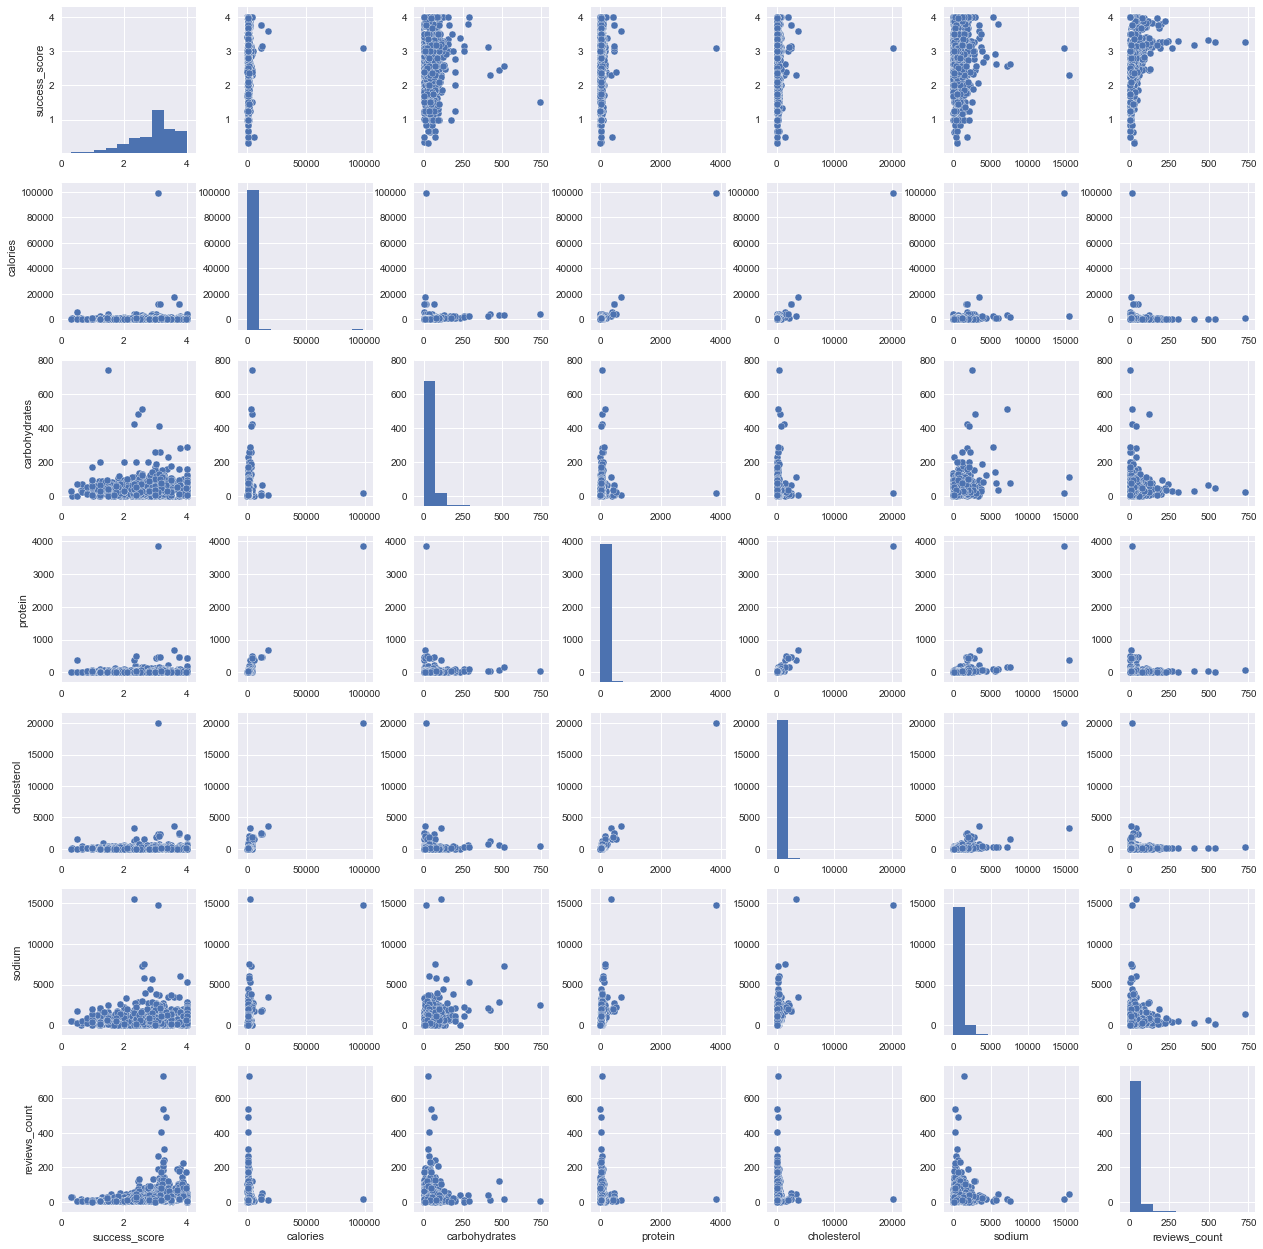

In [349]:
sns.pairplot(df[['success_score','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

## Features Selection

In [350]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 90 features
rfe = RFE(model, 90)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))


In [351]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]
    

In [352]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df

,success_score,rating,url,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
index,,,,,,,,,,,,,,,,,,,,,
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",4.000,4.0,https://www.epicurious.com/recipes/food/views/...,190,10,2,6,344,2,15,...,0,0,0,0,0,0,0,0,0,0
"""Nextover"" Chicken Tacos with Quick Refried Beans",2.010,3.0,https://www.epicurious.com/recipes/food/views/...,1224,65,65,292,1632,3,20,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,2.905,3.5,https://www.epicurious.com/recipes/food/views/...,463,42,35,115,917,6,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,476,20,22,70,1046,11,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,2.500,2.5,https://www.epicurious.com/recipes/food/views/...,482,18,30,230,1189,3,10,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Buffalo Grilled Chicken Wings,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,569,1,40,282,682,1,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),1.200,2.0,https://www.epicurious.com/recipes/food/views/...,736,89,35,66,922,5,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,2.250,3.0,https://www.epicurious.com/recipes/food/views/...,467,2,64,213,669,4,25,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chipotle-Lime Grilled Steak,3.000,3.0,https://www.epicurious.com/recipes/food/views/...,353,3,36,116,504,6,60,...,0,0,0,0,0,0,0,0,0,0


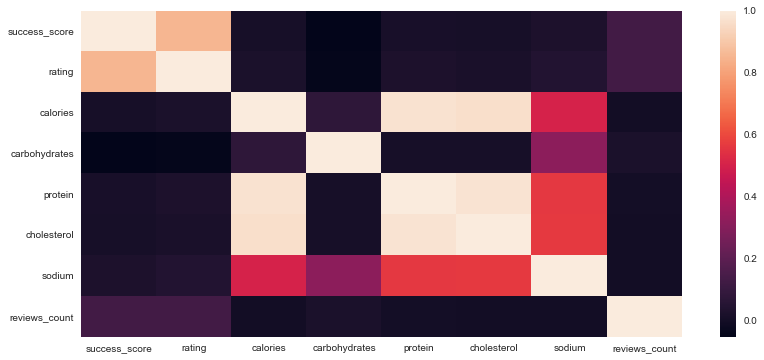

In [353]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']].corr())

In [354]:
df.describe()


,success_score,rating,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,Egg,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
count,1517.00000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,...,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,2.96496,3.382004,688.323665,38.027686,33.270929,153.690837,730.007910,25.615030,65.241266,0.097561,...,0.004614,0.004614,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955
std,0.71083,0.434251,2667.917096,43.020833,107.602279,564.318168,868.607872,40.831328,62.789297,0.296818,...,0.067795,0.067795,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786
min,0.31500,1.000000,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.55500,3.000000,288.000000,13.000000,9.000000,26.000000,247.000000,6.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.08000,3.500000,485.000000,29.000000,23.000000,93.000000,553.000000,14.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.50000,3.500000,730.000000,51.000000,39.000000,183.000000,982.000000,31.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.00000,4.000000,98668.000000,741.000000,3840.000000,20077.000000,15504.000000,731.000000,360.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Regression Model

### Linear Regression on Basic Features

In [355]:
X = df.drop(['rating','success_score','url'], axis =1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']]

In [356]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.286
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           0.000110
Time:                        21:26:43   Log-Likelihood:                -1123.7
No. Observations:                1061   AIC:                             2263.
Df Residuals:                    1053   BIC:                             2303.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9059      0.041     70.218      0.000       2.825       2.987
calories       1.784e-05   4.34e-05      0.411      0.681   -6.74e-05       0.000
carbohydrates    -0.0015      0.001     -2.325      0.020      -0.003      -0.000
protein           0.0011      0.001      0.921      0.357      -0.001       0.004
cholesterol      -0.0003      0.000     -1.360      0.174      -0.001       0.000
sodium         8.785e-05    3.9e-05      2.252      0.025    1.13e-05       0.000
reviews_count     0.0024      0.001      4.471      0.000       0.001       0.003
cooking_time     -0.0001      0.000     -0.336      0.737      -0.001       0.001
==============================================================================
Omnibus:                       61.474   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.783
Skew:                          -0.617   Prob(JB):                     4.26e-16
Kurtosis:                       3.278   Cond. No.                     6.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression on categorical variables for Ingredients

In [357]:
## Exclude basic variables
X_2 = X_train.drop(['calories', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'reviews_count','cooking_time'], 1)

In [358]:
lm2 = sm.OLS(y_train, X_2)
lm2_fit = lm2.fit()
lm2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     15.14
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          3.04e-131
Time:                        21:26:45   Log-Likelihood:                -2222.8
No. Observations:                1061   AIC:                             4626.
Df Residuals:                     971   BIC:                             5073.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Egg                          1.0948      0.227      4.829      0.000       0.650       1.540
Pork                         1.4125      0.254      5.559      0.000       0.914       1.911
Parmesan                     1.7453      0.296      5.899      0.000       1.165       2.326
Herb                         1.4499      0.333      4.348      0.000       0.795       2.104
Sausage                      1.5802      0.329      4.805      0.000       0.935       2.226
Seafood                      0.4392      0.453      0.971      0.332      -0.449       1.327
Lemon                        1.4599      0.391      3.737      0.000       0.693       2.226
Nut                          1.1567      0.429      2.699      0.007       0.316       1.998
Pepper                       1.5734      0.416      3.786      0.000       0.758       2.389
Shellfish                    1.2149      0.553      2.196      0.028       0.129       2.301
Butter                       1.5109      0.402      3.754      0.000       0.721       2.301
Green Bean                   1.5862      0.415      3.822      0.000       0.772       2.401
Salmon                       1.8013      0.501      3.593      0.000       0.818       2.785
Mint                         1.3477      0.461      2.921      0.004       0.442       2.253
Yogurt                       1.0825      0.458      2.364      0.018       0.184       1.981
Parsley                      0.8131      0.465      1.749      0.081      -0.099       1.725
Vinegar                      1.7413      0.420      4.142      0.000       0.916       2.566
Basil                        1.4635      0.427      3.426      0.001       0.625       2.302
Orange                       1.7951      0.433      4.146      0.000       0.945       2.645
Ham                          1.9489      0.493      3.952      0.000       0.981       2.917
Tortillas                    2.1610      0.447      4.838      0.000       1.284       3.038
Chile Pepper                 1.5145      0.487      3.112      0.002       0.559       2.470
Root Vegetable               1.6000      0.475      3.368      0.001       0.668       2.532
Lettuce                      0.9308      0.549      1.695      0.090      -0.147       2.008
Mayonnaise                   1.9323      0.497      3.885      0.000       0.956       2.908
Cheddar                      1.0694      0.512      2.091      0.037       0.066       2.073
Chickpea                     1.3959      0.498      2.805      0.005       0.419       2.373
Almond                       0.1868      0.528      0.354      0.724      -0.849       1.223
Raisin                       0.8919      0.583      1.529      0.127      -0.253       2.036
Honey                        1.3389      0.599      2.233      0.026       0.162       2.515
Walnut        

### Linear Regression on all features

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm3 = sm.OLS(y_train, X_train)
lm3_fit = lm3.fit()
lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     37.98
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          1.31e-266
Time:                        21:26:47   Log-Likelihood:                -1853.4
No. Observations:                1061   AIC:                             3901.
Df Residuals:                     964   BIC:                             4383.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
calories                     0.0003      0.000      2.479      0.013    6.45e-05       0.001
carbohydrates                0.0050      0.001      3.669      0.000       0.002       0.008
protein                      0.0039      0.003      1.402      0.161      -0.002       0.009
cholesterol                 -0.0010      0.001     -1.859      0.063      -0.002    5.31e-05
sodium                       0.0006   8.32e-05      7.017      0.000       0.000       0.001
reviews_count                0.0108      0.001      9.956      0.000       0.009       0.013
cooking_time                 0.0088      0.001     12.912      0.000       0.007       0.010
Egg                          0.7803      0.179      4.366      0.000       0.430       1.131
Pork                         0.2638      0.187      1.409      0.159      -0.104       0.631
Parmesan                     1.0740      0.212      5.060      0.000       0.657       1.490
Herb                         0.6439      0.237      2.720      0.007       0.179       1.108
Sausage                      0.5959      0.259      2.303      0.021       0.088       1.104
Seafood                      0.4945      0.275      1.799      0.072      -0.045       1.034
Lemon                        0.5123      0.261      1.960      0.050      -0.001       1.025
Nut                          0.5236      0.323      1.619      0.106      -0.111       1.158
Pepper                       0.9077      0.274      3.315      0.001       0.370       1.445
Shellfish                    0.4449      0.339      1.312      0.190      -0.220       1.110
Butter                       0.7558      0.295      2.561      0.011       0.177       1.335
Green Bean                   0.8086      0.332      2.434      0.015       0.157       1.461
Salmon                       0.8998      0.324      2.781      0.006       0.265       1.535
Mint                         1.2681      0.386      3.284      0.001       0.510       2.026
Yogurt                       0.3749      0.313      1.198      0.231      -0.239       0.989
Parsley                      0.9350      0.327      2.859      0.004       0.293       1.577
Vinegar                      0.8303      0.354      2.347      0.019       0.136       1.524
Basil                        0.6549      0.324      2.018      0.044       0.018       1.292
Orange                       1.0877      0.318      3.419      0.001       0.463       1.712
Ham                          0.6285      0.328      1.919      0.055      -0.014       1.271
Tortillas                    0.9244      0.340      2.720      0.007       0.258       1.591
Chile Pepper                 0.7763      0.337      2.305      0.021       0.115       1.437
Root Vegetable               0.6464      0.389      1.660      0.097      -0.118       1.411
Lettuce       

R^2 = 75%

In [360]:
"""Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.
P >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model
Prob(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.
Jaque Beara: Normality Test
Prob(JB) Null hypothesis: ε is normally distributed.
Skewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.
Condition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables"""

'Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.\nP >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model\nProb(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.\nJaque Beara: Normality Test\nProb(JB) Null hypothesis: ε is normally distributed.\nSkewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.\nCondition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables'

### Predictions and Evaluations

In [361]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.557191372889
MSE: 0.5282220136
RMSE: 0.726788837008


Text(0,0.5,'Predicted outcome')

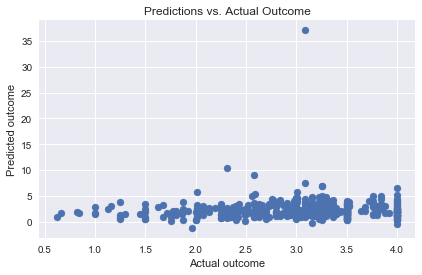

In [362]:
y_predicted = lm3_fit.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

#### Residual Histogram

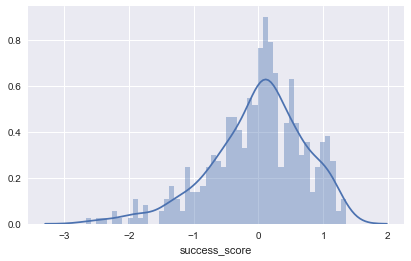

In [363]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


Text(0,0.5,'Residuals')

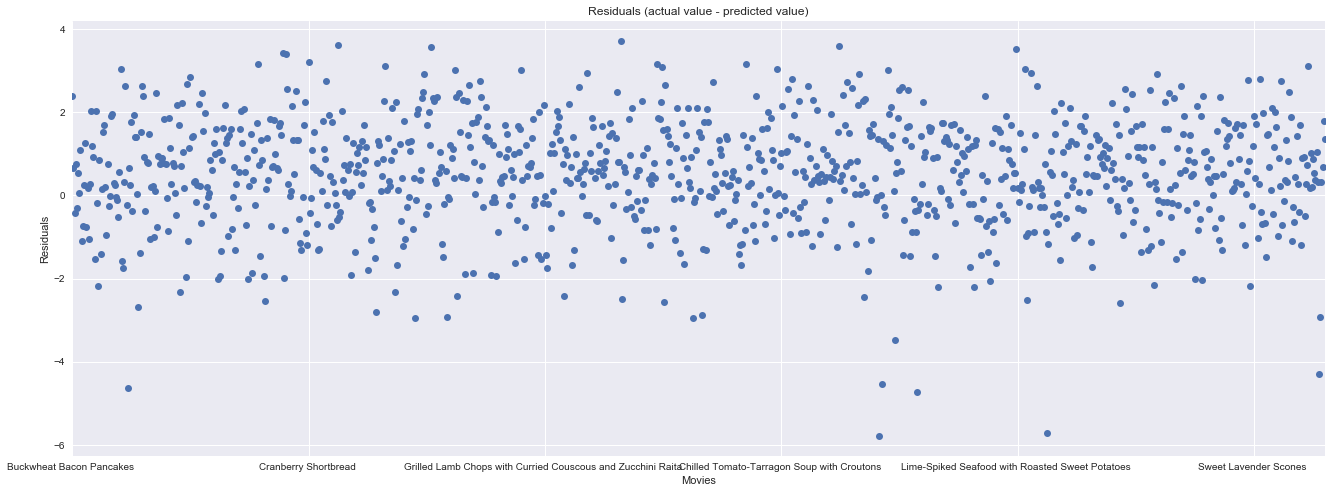

In [364]:
lm3_fit.resid.plot(style='o', figsize=(20,8))
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Movies')
plt.ylabel('Residuals')

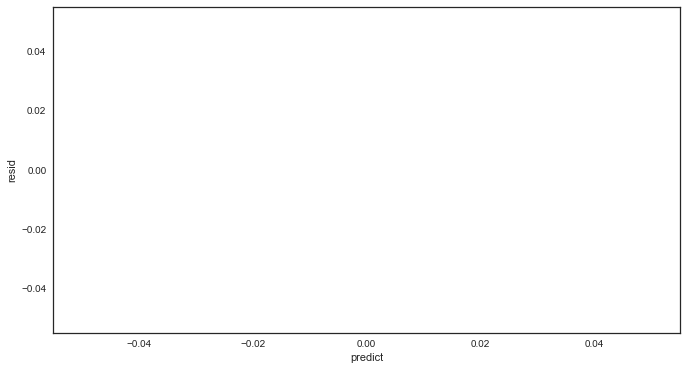

In [365]:
#homoscedasticity
data = pd.DataFrame()
data['predict']= predictions
data['resid']= y_test-predictions
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

## Cross-validation

In [366]:
X = df.drop(['rating','success_score','url'], axis =1)
y = df['success_score']

In [367]:

lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print (scores, scores.mean())

[-0.06896265 -0.02545855 -0.05339285 -0.21592988 -0.14717026] -0.102182838333


ValueError: x and y must have same first dimension, but have shapes (195,) and (1517,)

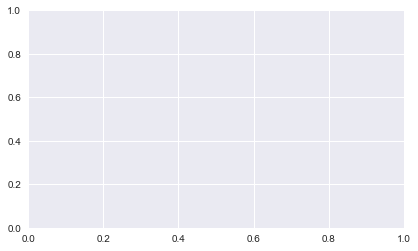

In [368]:
x_plot = np.linspace(0,1,195)
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])

encv.fit(X,y)
plt.plot(x_plot, encv.predict(X))

alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X,y)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X,y)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X,y)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

In [369]:
X.shape

(1517, 97)

In [277]:
y.shape

(1517,)